<a href="https://colab.research.google.com/github/PashaIanko/Robust-Feature-Selection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [164]:
# Colab
from google.colab import drive

# paths
import os

# data
import pandas as pd

# sklearn
from sklearn.model_selection import train_test_split

# math
import numpy as np

# plotting
from matplotlib import pyplot as plt

In [2]:
# PEP 8 standard
%%capture 
!pip install pycodestyle 
!pip install --index-url https://test.pypi.org/simple/ nbpep8 
from nbpep8.nbpep8 import pep8

# Read the data

In [3]:
drive.mount('/content/gdrive')
datasets_folder_path = \
    '/content/gdrive/MyDrive/ML/DataScience_Dataset 2022-2023'

assert os.path.isdir(datasets_folder_path)

Mounted at /content/gdrive


# 5. PHQ9_GAD7

## Download the data

In [4]:
def read_data(root_path, folder_name):
    if folder_name == '5. PHQ9_GAD7':
        
        phq9_gad_7_csv_path = os.path.join(
            datasets_folder_path,
            '5. PHQ9_GAD7',
            'PHQ9_GAD7_df.csv'
        )
        assert os.path.isfile(phq9_gad_7_csv_path)
        
        return pd.read_csv(
            phq9_gad_7_csv_path,
            sep=';'
        )

In [5]:
dataset = read_data(
    datasets_folder_path,
    '5. PHQ9_GAD7'
)

pep8(_ih)

In [6]:
dataset.head()

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,CONDITION
0,3,1,1,3,1,1,2,1,2,2,3,2,2,2,3,2,H
1,2,1,3,3,1,1,3,1,5,3,3,3,2,1,3,5,H
2,3,2,2,3,4,3,2,2,2,3,2,3,3,3,3,3,H
3,2,2,4,3,2,4,1,4,4,2,4,4,1,1,1,3,H
4,2,2,5,2,4,3,4,2,4,3,2,5,3,1,5,2,H


## Quick look & check the data

In [7]:
dataset.describe()

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,3.252236,3.017889,3.538462,3.588551,3.313953,3.164580,2.967800,2.903399,3.265653,3.570662,3.722719,3.700358,3.118068,3.111807,3.445438,3.732558
std,1.470348,1.662597,1.421741,1.329620,1.504634,1.584876,1.649948,1.652855,1.619626,1.387345,1.265209,1.271765,1.586767,1.552721,1.340830,1.353742
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Data clean check

In [8]:
def check_data(dataset_):
    # Check is any NAN values
    assert dataset_.isna().sum().sum() == 0

    # Check that all values are in appropriate range
    assert (dataset_.values[:, :-1] <= 5).all() \
        & (dataset_.values[:, :-1] >= 0).all()

check_data(dataset)

### Class balance

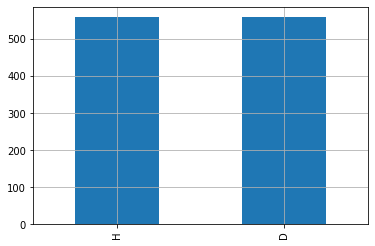

In [9]:
ax = dataset.CONDITION.value_counts().plot(kind='bar')
ax.grid()

## Create trainval + test sets

- Use stratified sampling, to support the same class balance in train, validation and test sets
- For training the model (and exploring the data for optimizing the model), we split the dataset into train, validation & test sets with train_test_split function of sklearn (which shuffles the dataset and disrupts the initial structure)
- For gaining psychological insights, we sample the exploration set out of the initial set, **complying with the initial structure** (e.g. if we sample 50% of the dataset --> the sampled data contains honest and dishonest response of the same people, and the structure of the dataset is the same)

### Data sampling for the model

In [10]:
TRAINVAL_SIZE = 0.8
TRAIN_SIZE = 0.8
RANDOM_STATE = 42

df_trainval, df_test = train_test_split(
    dataset,
    train_size=TRAINVAL_SIZE,
    random_state=RANDOM_STATE,
    stratify=dataset.CONDITION
)

print(df_trainval.shape, df_test.shape)

pep8(_ih)

(894, 17) (224, 17)



In [11]:
df_train, df_validation = train_test_split(
    df_trainval,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_trainval.CONDITION
)

print(df_train.shape, df_validation.shape)
pep8(_ih)

(715, 17) (179, 17)



### Data sampling for psycholodical insights

In [12]:
def prepare_sample(
    dataset_,
    sample_size_,
    random_state_=RANDOM_STATE
):
    # Assume the proper structure of the dataset
    # (even number of rows - first honest, then dishonest
    # responses)

    '''
    We split the dataset into 2 halves (of honest and dishonest responses)
    Then generate a sample of random indices, subsample same sample from honest
    half, and dishonest half. And concatenate the samples
    '''

    honest_subset = pd.DataFrame(
        dataset_.loc[: (dataset_.shape[0] / 2) - 1]
    )
    dishonest_subset = pd.DataFrame(
        dataset_.loc[dataset_.shape[0] / 2:]
    )

    dishonest_subset.reset_index(inplace=True)
    dishonest_subset.drop(['index'], axis='columns', inplace=True)

    assert honest_subset.shape[0] == dishonest_subset.shape[0]
    assert honest_subset.shape[0] + dishonest_subset.shape[0] \
        == dataset.shape[0]
    assert honest_subset.CONDITION.nunique() \
        == dishonest_subset.CONDITION.nunique() \
        == 1
    assert (honest_subset.index == dishonest_subset.index).all()

    np.random.seed(random_state_)

    sample = np.random.choice(
        range(honest_subset.shape[0]),
        replace=False,
        size=int(honest_subset.shape[0] * sample_size_)
    )

    res = pd.concat(
        [
            honest_subset.loc[sample],
            dishonest_subset.loc[sample]
        ]
    )
    assert res.shape[1] \
        == honest_subset.shape[1] \
        == dishonest_subset.shape[1]

    return res


pep8(_ih)

In [71]:
def verify_sample_correctness(df_original_, df_sampled_):
    for i in df_sampled_.index:
        # assert that both Honest and Dishonest conditions are present
        assert len(df_sampled_.index[df_sampled_.index == i]) == 2
        assert 'H' in df_sampled_.loc[i].CONDITION.values \
            and 'D' in df_sampled_.loc[i].CONDITION.values

        # Sample of honest and dishonest response of the same
        # person in original dataset
        original_sample = df_original_.loc[
            [i, int(df_original_.shape[0] / 2) + i]
        ]
        assert (original_sample.values == df_sampled_.loc[i].values).all()


pep8(_ih)

In [70]:
PSYCHOLOGIC_SAMPLE_SIZE = 0.7

df_sample = prepare_sample(
    dataset,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(dataset, df_sample)
df_sample.head()

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,CONDITION
158,3,3,4,4,3,2,3,2,1,4,3,4,4,1,4,5,H
451,2,1,2,2,1,2,1,1,1,2,2,1,2,4,2,1,H
55,2,1,4,3,2,1,2,1,5,2,3,2,2,1,3,4,H
247,2,1,2,2,2,1,2,1,1,1,3,3,3,1,1,2,H
70,1,1,2,2,1,1,2,2,5,1,3,2,1,1,2,3,H


## Data exploration (on train set only)

### Insight №1 - Averaged across patients, relative change in response for malinglers is from 46% to 197% (exaggerated)

In [72]:
df_train_honest = df_train[df_train['CONDITION'] == 'H']
df_train_dishonest = df_train[df_train['CONDITION'] == 'D']

result = {}

for question in df_train.columns[df_train.columns != 'CONDITION']:
   mean_response_honest = df_train_honest[question].mean()
   mean_response_dishonest = df_train_dishonest[question].mean()

   result[question] = {
       'honest': mean_response_honest,
       'dishonest': mean_response_dishonest
   }

responses = pd.DataFrame(result).transpose()

1.9736910148674853 0.46296499908374555


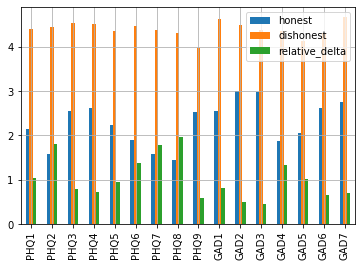

In [73]:
responses['relative_delta'] = \
    (responses['dishonest'] - responses['honest']) \
    / (responses['honest'])

ax = responses.plot(kind='bar')
ax.grid()

print(responses.relative_delta.max(), responses.relative_delta.min())

In [82]:
responses.head()

,honest,dishonest,relative_delta
PHQ1,2.150838,4.392157,1.042068
PHQ2,1.581006,4.450980,1.815284
PHQ3,2.553073,4.546218,0.780685
PHQ4,2.622905,4.521008,0.723665
PHQ5,2.231844,4.358543,0.952889


### Insight №2 - what happens for a concrete person, without averaging? Some people try to fake, others - simply maximize all responses

In [112]:
def plot_person_response(df_, df_indices_):
    for df_index in df_indices_:
        ax = df_.loc[
            df_index,
            [c for c in df_.columns if c != 'CONDITION']
        ].transpose().plot(kind='bar')
        ax.legend(df_.loc[df_index, 'CONDITION'])
        ax.set_title(f'Person with index {df_index}')

pep8(_ih)

cell_content.py:10:1: E305 expected 2 blank lines after class or function definition, found 1



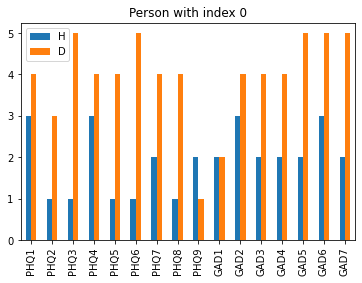

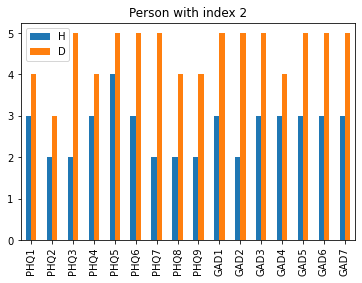

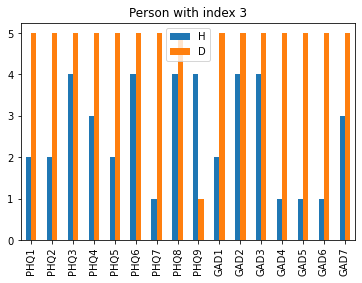

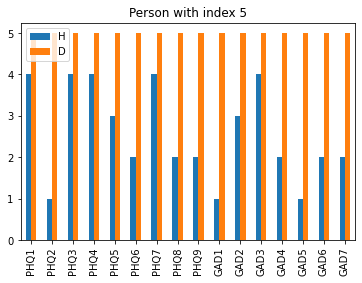

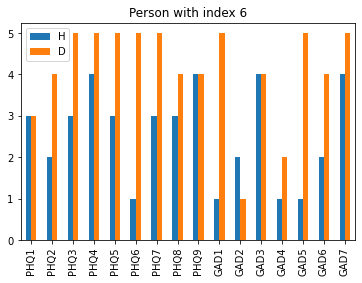

In [114]:
plot_person_response(
    df_sample,
    np.unique(df_sample.index)[:5]
)

### Insight № 3 - average elevation in dishonest response is around 2-3 points

In [246]:
def plot_dishonest_responses(df_sample):
    fig, ax = plt.subplots()
    questions = df_sample.columns[df_sample.columns != 'CONDITION']
    unique_person_indices = np.unique(df_sample.index)
    differences_in_response = []
    honest_responses_array = []
    dishonest_responses_array = []

    for unique_person_index in unique_person_indices:
        # view with Honest and Dishonest responses of the same person
        person_responses = pd.DataFrame(
            df_sample.loc[unique_person_index])
        honest_responses = person_responses.loc[
            person_responses['CONDITION'] == 'H',
            questions]
        dishonest_responses = person_responses.loc[
            person_responses['CONDITION'] == 'D',
            questions]

        plotting_params = dict(marker='o', alpha=0.1)
        ax.scatter(
            x=range(honest_responses.shape[1]),
            y=honest_responses.values[0],
            color='red',
            **plotting_params
        )

        ax.scatter(
            x=range(honest_responses.shape[1]),
            y=dishonest_responses.values[0],
            color='blue',
            **plotting_params
        )
        differences_in_response.append(
            dishonest_responses.values[0] - honest_responses.values[0])
        
        honest_responses_array.append(honest_responses.values[0])
        dishonest_responses_array.append(dishonest_responses.values[0])
        del person_responses
    
    ax.set_xlabel('Questions')
    ax.set_ylabel('Response')
    ax.legend(['Honest', 'Dishonest'], loc='lower right')
    ax.grid()
    
    return differences_in_response, honest_responses_array, \
        dishonest_responses_array


pep8(_ih)

cell_content.py:36:1: W293 blank line contains whitespace
cell_content.py:40:1: W293 blank line contains whitespace



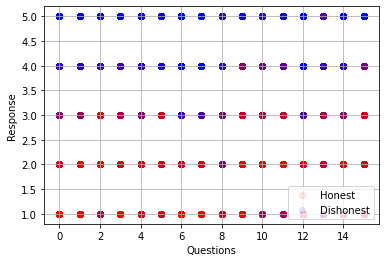

In [247]:
differences_in_response, honest_responses_array, dishonest_responses_array =\
    plot_dishonest_responses(
        df_sample
    )

In [248]:
average_difference_in_response = np.mean(
    differences_in_response,
    axis=0
)

average_honest_responses = np.mean(
    honest_responses_array,
    axis=0
)

average_dishonest_responses = np.mean(
    dishonest_responses_array,
    axis=0
)

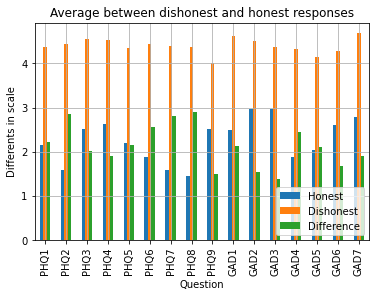

In [249]:
ax = pd.DataFrame(
    [
        average_honest_responses,
        average_dishonest_responses,
        average_difference_in_response
     ],
    columns=df_sample.columns[df_sample.columns != 'CONDITION'],
    index=['Honest', 'Dishonest', 'Difference']
).transpose().plot(kind='bar')

ax.grid()
ax.set_title('Average between dishonest and honest responses')
ax.set_xlabel('Question')
ax.set_ylabel('Differents in scale')
ax.legend(loc='lower right')